# Mushroom Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [6]:
df.shape

(8124, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [12]:
df = df.astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [14]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [15]:
# Label Encoding 

Label = LabelEncoder()


In [16]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [17]:
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

for i in df.columns:
    print(f"{i}: {df[i].unique()}")
    print("--------------------------------------------")


class: ['p', 'e']
Categories (2, object): ['e', 'p']
--------------------------------------------
cap-shape: ['x', 'b', 's', 'f', 'k', 'c']
Categories (6, object): ['b', 'c', 'f', 'k', 's', 'x']
--------------------------------------------
cap-surface: ['s', 'y', 'f', 'g']
Categories (4, object): ['f', 'g', 's', 'y']
--------------------------------------------
cap-color: ['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r']
Categories (10, object): ['b', 'c', 'e', 'g', ..., 'r', 'u', 'w', 'y']
--------------------------------------------
bruises: ['t', 'f']
Categories (2, object): ['f', 't']
--------------------------------------------
odor: ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']
Categories (9, object): ['a', 'c', 'f', 'l', ..., 'n', 'p', 's', 'y']
--------------------------------------------
gill-attachment: ['f', 'a']
Categories (2, object): ['a', 'f']
--------------------------------------------
gill-spacing: ['c', 'w']
Categories (2, object): ['c', 'w']
-----------------------

In [18]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [19]:
for i in df.columns:
    df[i] = Label.fit_transform(df[i])

In [20]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [21]:
for i in df.columns:
    print(f"{i}: {df[i].unique()}")
    print("--------------------------------------------")

class: [1 0]
--------------------------------------------
cap-shape: [5 0 4 2 3 1]
--------------------------------------------
cap-surface: [2 3 0 1]
--------------------------------------------
cap-color: [4 9 8 3 2 5 0 7 1 6]
--------------------------------------------
bruises: [1 0]
--------------------------------------------
odor: [6 0 3 5 2 1 8 7 4]
--------------------------------------------
gill-attachment: [1 0]
--------------------------------------------
gill-spacing: [0 1]
--------------------------------------------
gill-size: [1 0]
--------------------------------------------
gill-color: [ 4  5  2  7 10  3  9  1  0  8 11  6]
--------------------------------------------
stalk-shape: [0 1]
--------------------------------------------
stalk-root: [3 2 1 4 0]
--------------------------------------------
stalk-surface-above-ring: [2 0 1 3]
--------------------------------------------
stalk-surface-below-ring: [2 0 3 1]
--------------------------------------------
stalk-colo

In [22]:
# splitting of data into dependant and independant variables

x  = df.drop('class' , axis = 1)
y = df['class']

C:\Users\SIDDHARTH LUMAR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


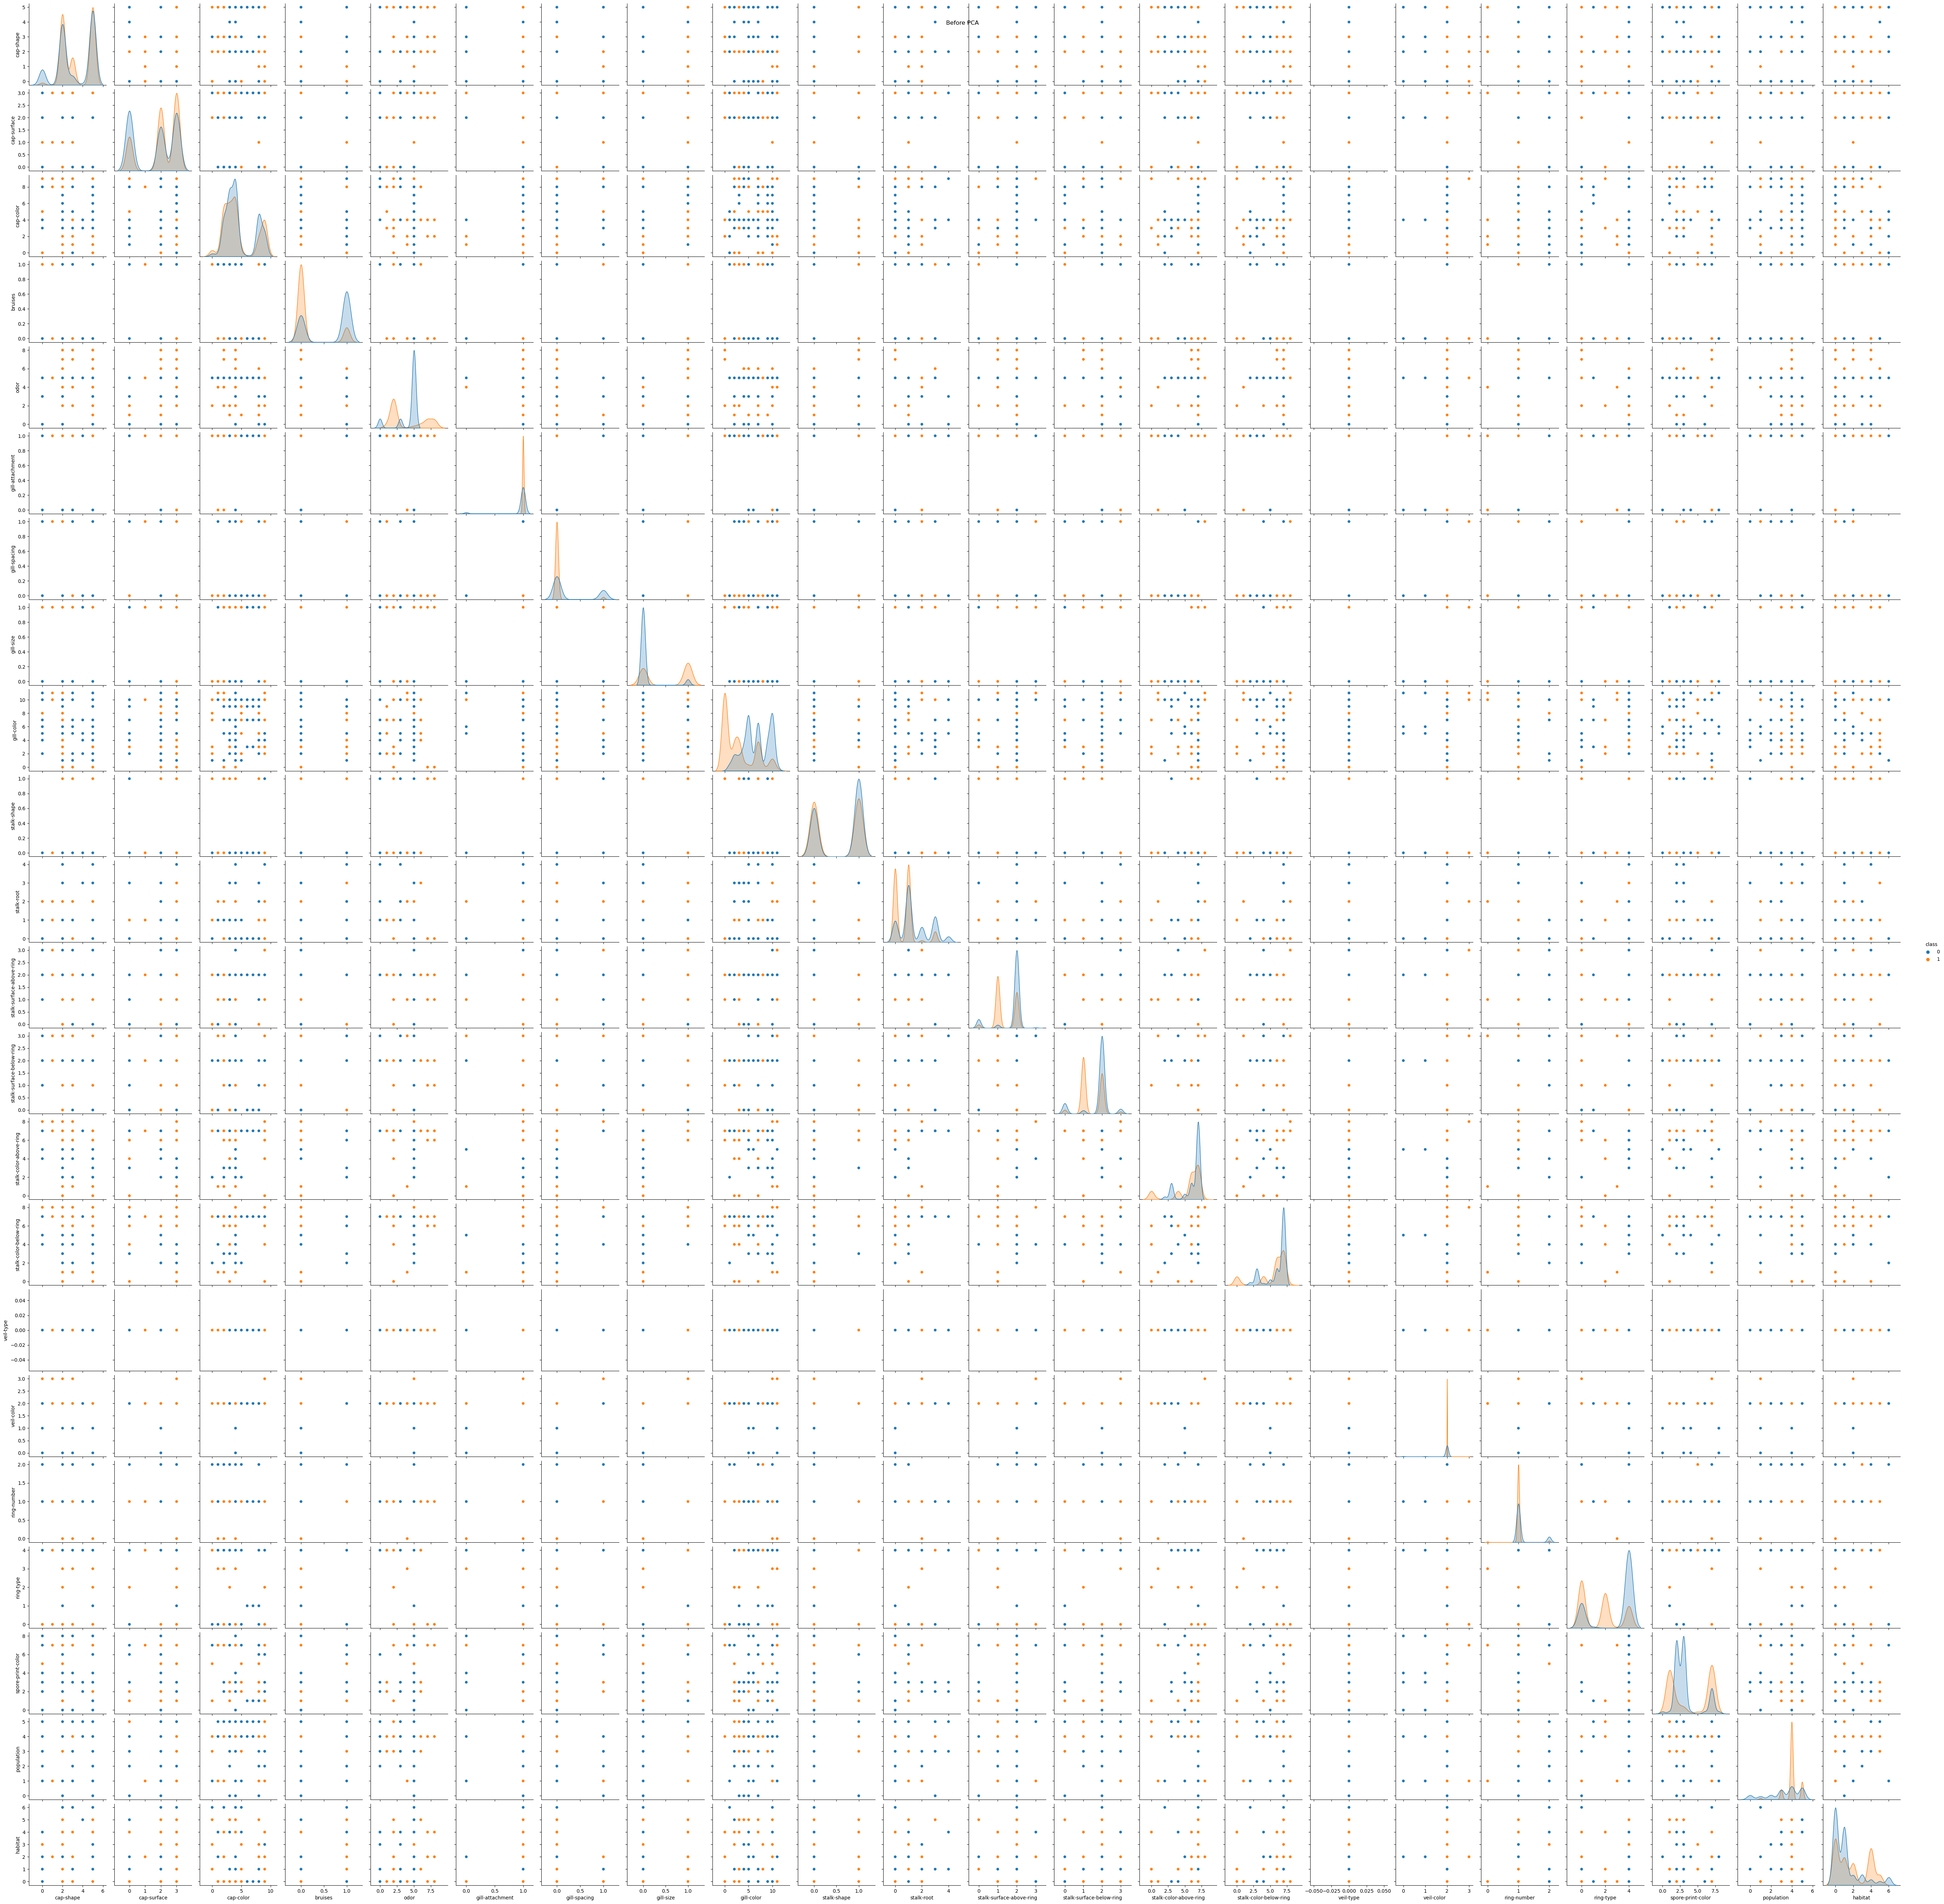

In [23]:
# Pairplot before PCA
sns.pairplot(df, hue='class')
plt.suptitle("Before PCA")
plt.show()

In [24]:
# Applying PCA
pca = PCA(n_components=7)
X_pca = pca.fit_transform(x)

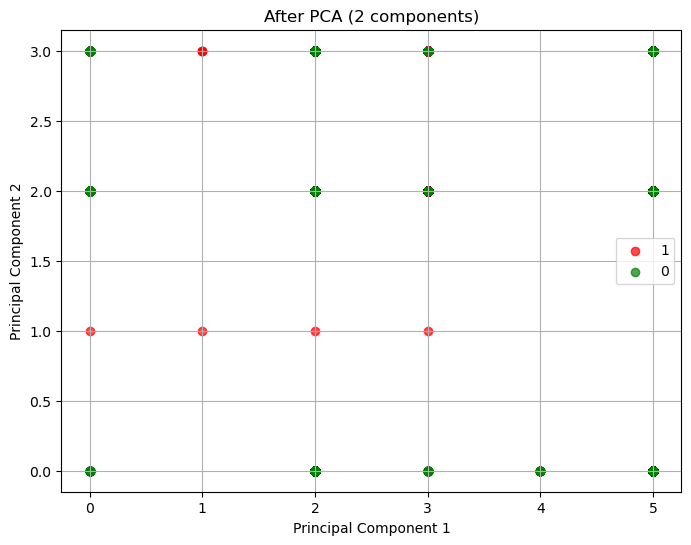

In [25]:
# ---------- After PCA ----------
# Plot PCA reduced components
plt.figure(figsize=(8,6))

colors = ['r', 'g']  # Adjust number of colors to your number of classes
target_names = y.unique()

for color, i, target_name in zip(colors, target_names, target_names):
    plt.scatter(x[y == i].iloc[:, 0], x[y == i].iloc[:, 1], color=color, alpha=0.7, label=target_name)

plt.legend()
plt.title('After PCA (2 components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [26]:
# spliting the into training and testing 

x_train ,x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

In [27]:
# MODEL TRAINING

Model_1 = LogisticRegression()
Model_1.fit(x_train,y_train)
y_pred_1 = Model_1.predict(x_test)

C:\Users\SIDDHARTH LUMAR\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
Model_3 = SVC()
Model_3.fit(x_train,y_train)
y_pred_3 = Model_3.predict(x_test)

In [30]:
Model_4 = DecisionTreeClassifier()
Model_4.fit(x_train,y_train)
y_pred_4 = Model_4.predict(x_test)

In [31]:
Model_5 = RandomForestClassifier()
Model_5.fit(x_train,y_train)
y_pred_5 = Model_5.predict(x_test)

In [32]:
print("LOGISTIC REGRESSION :", accuracy_score(y_test,y_pred_1))
print("SVM CLASSIFIER: " ,accuracy_score(y_test,y_pred_3))
print("DECISSION TREE CLASSIFIER:" ,accuracy_score(y_test,y_pred_4))
print("RANDOM FOREST CLASSIFIER :", accuracy_score(y_test,y_pred_5))

LOGISTIC REGRESSION : 0.9569230769230769
SVM CLASSIFIER:  0.9932307692307693
DECISSION TREE CLASSIFIER: 1.0
RANDOM FOREST CLASSIFIER : 1.0


In [33]:
# KNN 

x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

# Ensure both train and test have same columns
x_test = x_test.reindex(columns = x_train.columns, fill_value=0)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()


Model_2 = KNeighborsClassifier()
Model_2.fit(x_train,y_train)
y_pred_2 = Model_2.predict(x_test)

print("KNEIGHBOR CLASSIFIER :" ,accuracy_score(y_test,y_pred_2))

KNEIGHBOR CLASSIFIER : 0.9993846153846154


===== Logistic Regression =====
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       845
           1       0.97      0.94      0.95       780

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

Confusion Matrix:
[[819  26]
 [ 44 736]]


C:\Users\SIDDHARTH LUMAR\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


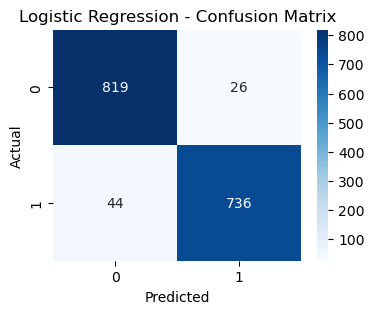

===== KNeighbors classifier =====
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[845   0]
 [  1 779]]


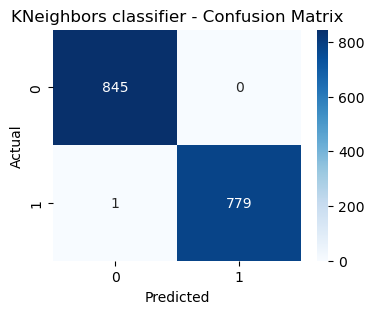

===== SVM CLASSIFIER =====
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       845
           1       1.00      0.99      0.99       780

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix:
[[844   1]
 [ 10 770]]


C:\Users\SIDDHARTH LUMAR\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


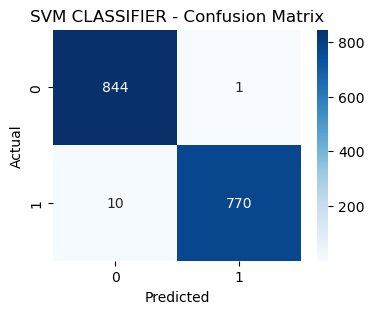

===== DicisionTREE CLASSIFIER =====
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[845   0]
 [  0 780]]


C:\Users\SIDDHARTH LUMAR\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


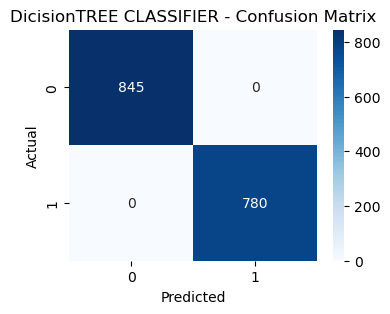

===== RANDOM FOREST CLASSIFIER =====
Classification Report:


C:\Users\SIDDHARTH LUMAR\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[845   0]
 [  0 780]]


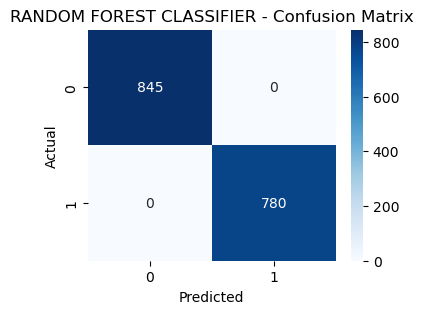

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# List of models and their names
models = [
    ('Logistic Regression', Model_1),
    ('KNeighbors classifier', Model_2),
    ('SVM CLASSIFIER', Model_3),
    ('DicisionTREE CLASSIFIER', Model_4),
    ('RANDOM FOREST CLASSIFIER', Model_5)
]

# Ensure x_test is properly preprocessed (encoded, numeric, numpy array)

for name, model in models:
    print(f"===== {name} =====")
    
    # Predict
    y_pred = model.predict(x_test)
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Plot Confusion Matrix Heatmap
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
